In [23]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
# load uhat dataset
with np.load('uhat_dataset.npz') as data:
    train_data = data['x_digits_train']
    test_data = data['x_digits_test']
    train_labels = data['y_digits_train']
    test_labels = data['y_digits_test']

In [25]:
# normalize image data and add make sure image shape is (28, 28, 1)
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [26]:
train_data, train_labels = shuffle(train_data, train_labels, random_state=0)
test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

In [27]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.05,
    zoom_range=0.05,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [28]:
num_classes = 10
input_shape = (28, 28, 1)

In [29]:
train_data.shape

(6606, 28, 28, 1)

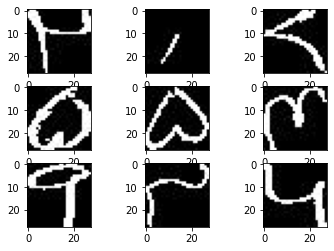

In [30]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [32]:
# compile model
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [34]:
batch_size = 256
epochs = 100

# model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.fit(datagen.flow(train_data, train_labels, batch_size=batch_size),
          steps_per_epoch=len(train_data) / batch_size, epochs=epochs)

Epoch 1/100
26/25 [==============================] - 2s 88ms/step - loss: 2.2256 - accuracy: 0.1591
Epoch 2/100
26/25 [==============================] - 2s 87ms/step - loss: 1.7693 - accuracy: 0.3707
Epoch 3/100
26/25 [==============================] - 2s 88ms/step - loss: 1.3708 - accuracy: 0.5165
Epoch 4/100
26/25 [==============================] - 2s 89ms/step - loss: 1.1096 - accuracy: 0.6149
Epoch 5/100
26/25 [==============================] - 2s 87ms/step - loss: 0.9736 - accuracy: 0.6671
Epoch 6/100
26/25 [==============================] - 2s 88ms/step - loss: 0.8704 - accuracy: 0.6985
Epoch 7/100
26/25 [==============================] - 2s 88ms/step - loss: 0.7960 - accuracy: 0.7248
Epoch 8/100
26/25 [==============================] - 2s 89ms/step - loss: 0.7420 - accuracy: 0.7351
Epoch 9/100
26/25 [==============================] - 2s 89ms/step - loss: 0.6922 - accuracy: 0.7598
Epoch 10/100
26/25 [==============================] - 2s 88ms/step - loss: 0.6553 - accuracy: 0.7796

26/25 [==============================] - 2s 89ms/step - loss: 0.2281 - accuracy: 0.9236
Epoch 82/100
26/25 [==============================] - 2s 87ms/step - loss: 0.2277 - accuracy: 0.9275
Epoch 83/100
26/25 [==============================] - 2s 87ms/step - loss: 0.2322 - accuracy: 0.9233
Epoch 84/100
26/25 [==============================] - 2s 87ms/step - loss: 0.2261 - accuracy: 0.9264
Epoch 85/100
26/25 [==============================] - 2s 88ms/step - loss: 0.2292 - accuracy: 0.9220
Epoch 86/100
26/25 [==============================] - 2s 88ms/step - loss: 0.2226 - accuracy: 0.9252
Epoch 87/100
26/25 [==============================] - 2s 87ms/step - loss: 0.2183 - accuracy: 0.9322
Epoch 88/100
26/25 [==============================] - 2s 89ms/step - loss: 0.2265 - accuracy: 0.9239
Epoch 89/100
26/25 [==============================] - 2s 88ms/step - loss: 0.2176 - accuracy: 0.9304
Epoch 90/100
26/25 [==============================] - 2s 87ms/step - loss: 0.2231 - accuracy: 0.9299
Epo

In [35]:
model.evaluate(test_data, test_labels, verbose=2)

45/45 - 0s - loss: 0.0858 - accuracy: 0.9731


[0.08575432002544403, 0.9731258749961853]

In [36]:
model.save('uhat_digits.m5')

INFO:tensorflow:Assets written to: uhat_digits.m5/assets


In [37]:
# train_data[0]

In [38]:
m = tf.keras.models.load_model('uhat_digits.m5')

In [39]:
m

In [40]:
m.predict

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9e9396bbd0>>

In [41]:
test_data[0].shape

(28, 28, 1)

In [42]:
test_input = test_data[0]
test_input = np.expand_dims(test_input, 0)
print(test_input.shape)
# m.predict(test_data[0])

(1, 28, 28, 1)
